# Prédiction de la structure secondaire des protéines à l'aide d'un FCNN

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importation des donnés

In [3]:
train = pd.read_csv('/content/gdrive/MyDrive/data/windowed_dataset/encode_train_5000.csv', chunksize=10000)

In [4]:
test = pd.read_csv('/content/gdrive/MyDrive/data/windowed_dataset/encode_test_1000.csv', chunksize=10000)

In [5]:
train = pd.concat(train)
test = pd.concat(test)

In [6]:
train.shape, test.shape

((1390636, 210), (276312, 210))

In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Les 10 premières colonnes indiquent la présence ou non d'une hélice. Les 200 suivantes indiquent les acides aminés, via un one_hot_encoding, présent dans la fenêtre d'observation de la séquence d'acides aminés. 

In [9]:
win_size = 10
N = train.shape[1]

In [10]:
y_train = train[[str(i) for i in range(win_size)]]
x_train = train[[str(i) for i in range(win_size, N)]]

y_test = test[[str(i) for i in range(win_size)]]
x_test = test[[str(i) for i in range(win_size, N)]]

In [11]:
# Pour faire de la place dans la mémoire
del train
del test

# Modélisation

In [12]:
def plot_loss_curves(history):
    """
    Trace les courbes de 'loss' pour les jeux d'entraînement et de validation
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

In [ ]:
tf.random.set_seed(7)

# Création du modèle
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu')
])
# Compilation
model.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics='mae')
# Fit
history = model.fit(x_train, y_train, batch_size=600, epochs=100, validation_data=(x_test, y_test))

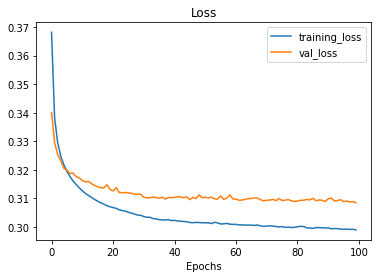

In [14]:
plot_loss_curves(history)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 40)                8040      
                                                                 
 dense_5 (Dense)             (None, 10)                410       
                                                                 
Total params: 48,650
Trainable params: 48,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('/content/gdrive/MyDrive/saved_models/model_projet_7_mae')

In [15]:
y_pred = model.predict(x_test)

8635/8635 [==============================] - 12s 1ms/step


In [16]:
metrics.mean_absolute_error(y_pred, y_test)

0.3084169743159104

C'est significativement mieux que ce que nous avions obtenu avec la baseline (0.48).

# Test

Notre modèle donne une prédiction pour chaque fenêtre, or un acide aminé d'une séquence est généralement présent dans plusieurs fenêtres donc il faut encore faire une moyenne sur les fenêtres pour obtenir une prédiction sur une séquence entière. Nous allons faire des tests à l'aide de fichiers ne contenant qu'une seule protéine puisque le dataframe 'test' ne contient pas de délimitations entre les protéines.

In [17]:
del x_train
del y_train
del x_test
del y_test

In [18]:
def get_sample_files(data_dir, n, seed):
    '''
    Renvoie n fichiers du dossier data_dir
    '''
    if seed is not None:
        random.seed(seed)
    sample = []
    for filename in random.sample(os.listdir(data_dir), n):
        f = os.path.join(data_dir, filename)
        sample.append(pd.read_csv(f))
    random.shuffle(sample)
    return sample

def new_format(df, win_size):
    '''
    Créer une version avec fenêtre d'une protéine, compatible avec l'entrée de notre modèle
    '''
    X = df.iloc[:win_size].values
    X = X.reshape(21 * win_size, order='F')
    X = np.expand_dims(X, axis=0)
    
    n_max = df.shape[0] - win_size + 1
    for i in range(1, n_max):
        b = df.iloc[i:i+win_size].values
        b = b.reshape(21 * win_size, order='F')
        b = np.expand_dims(b, axis=0)
        X = np.concatenate((X, b), axis=0)
    return X

def predire(model, x):
    '''
    Effectue la prédiction du modèle 'model' sur x et fait la moyenne sur les fenêtres
    '''
    pred = model.predict(x)
    m = x.shape[0] + win_size -1
    c = np.zeros([m, m])
    for i in range(x.shape[0]):
        c[i, i:i+win_size] = pred[i,:]
    pred = c.sum(axis=0) / win_size
    return pred

def get_mae(pred, true, n=None):
    '''
    Calcul la mae pour une prédiction ou une liste de prédictions
    '''
    if n is not None:
        a = pred[n]
        b = true[n]
        mae = metrics.mean_absolute_error(a, b)
        return mae
    else:
        m = len(pred)
        liste_mae = [get_mae(pred, true, i) for i in range(m)]
        mae = sum(liste_mae) / m
        return mae

In [20]:
test_dir = '/content/gdrive/MyDrive/data/test_samples'

n = 200
win_size = 10
seed = 42

In [21]:
# Récupère des protéines pour des tests
test = get_sample_files(test_dir, n=n, seed=seed)

In [22]:
# Récupère les véritable position des hélices
y_true = [df['helix'].values for df in test]

In [23]:
# Formatage des données pour le modèle
X_test = [new_format(df, win_size) for df in test]
X_test = [X[:, 10:]  for X in X_test]

In [ ]:
# Prédiction avec moyenne sur les fenêtres
y_pred = [predire(model, x) for x in X_test]

In [25]:
get_mae(y_pred, y_true)

0.3025600688198196

### Représentations graphiques

In [26]:
def plot_sample(y_pred, y_true, n):
  m = y_pred[n].shape[0]
  plt.figure(figsize=(15, 7))
  plt.plot(range(m), y_true[n], color='orange')
  plt.plot(range(m), y_pred[n], color='blue')
  plt.legend(['proba_pred', 'true'], loc="upper right")
  plt.xlabel('Position dans la séquence d\'acides aminés')
  plt.ylabel('probabilité d\'avoir une hélice')
  plt.title('Comparaison entre prédiction et réalité pour la protéine {0} de test'.format(n))

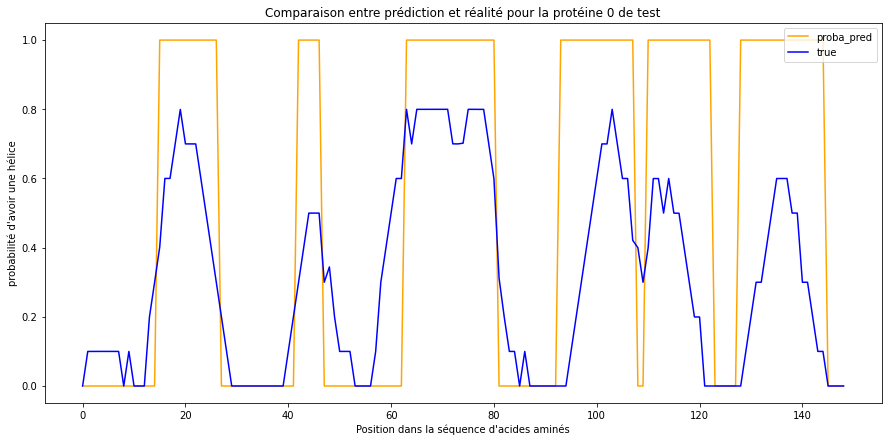

In [27]:
plot_sample(y_pred, y_true, 0)

In [28]:
get_mae(y_pred, y_true, 0)

0.316385401455348

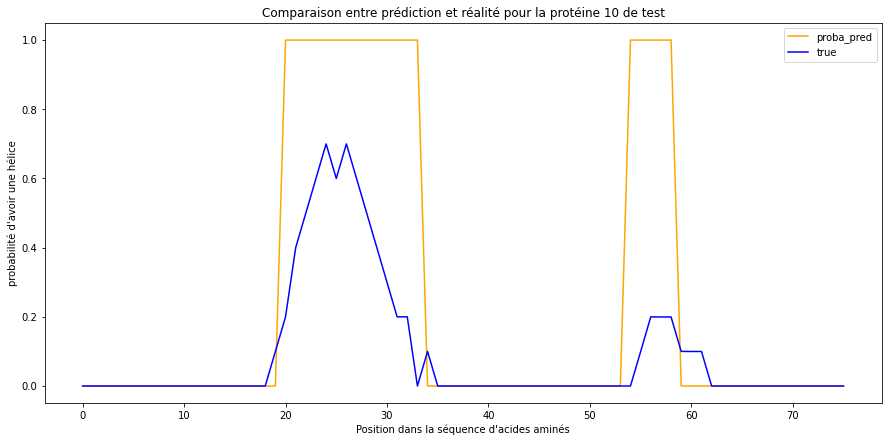

In [29]:
plot_sample(y_pred, y_true, 10)

In [30]:
get_mae(y_pred, y_true, 10)

0.1697769853629564

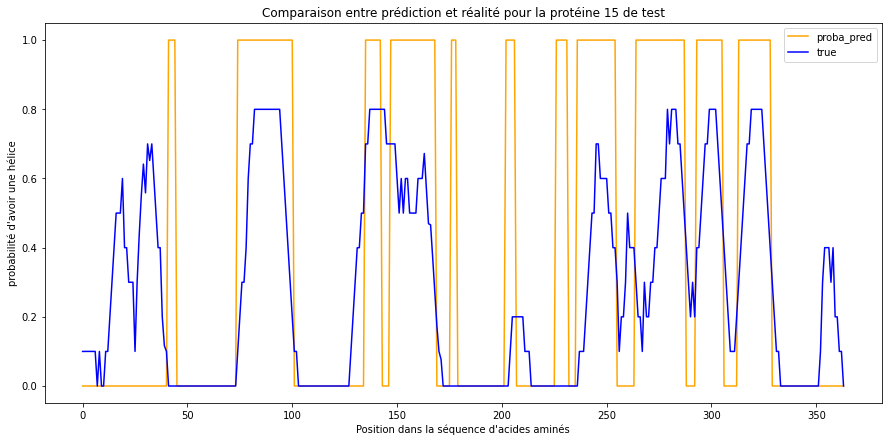

In [31]:
plot_sample(y_pred, y_true, 15)

In [32]:
get_mae(y_pred, y_true, 15)

0.28240590540917365